In [130]:
eq = [
    "4*x1 - x2 - 7",
    "-2*x1 + 5*x2 - x3 + 8",
    "-3*x2 + 6*x3 - x4 + 6",
    "-2*x3 + 3*x4 - 4",
]


In [131]:

import copy
import sympy as sym
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme
class Gauss:
    def __init__(self, _val:list, norm:float) -> None:
        self.__log = {0:{'x' : _val, 'norm': norm}}
    def include (self, __input:list, iter:int):
        self.__log[iter]= {'x' : __input, 'norm':float(sum((a - b) ** 2 for a, b in zip(__input, self.__log[iter-1]['x'])) ** 0.5)}
    def output(self):
        return self.__log
    def plot(self):
        plt.plot([i for i in range(len(self.__log))][1:], [self.__log[i]['norm'] for i in range(len(self.__log))][1:])
        plt.title("Gauss-Siedel")
        plt.xlabel("Iterasi ke -")
        plt.ylabel("Error rate")
        plt.show()
class iterate:
    def __init__(self, _eq: list) -> None:
        self.eq = []

        for i in range(len(_eq)):
            _eq[i] = sym.sympify(_eq[i])
            _eq[i] = sym.solve(_eq[i], sym.Symbol(f"x{i + 1}"))[0]

        for i in range(len(_eq) + 1):
            globals()[f"x{i+1}"] = sym.Symbol(f"x{i+1}")

        for i in range(len(_eq)):
            self.eq.append(sym.sympify(str(_eq[i])))

        self.x = {0: [0] * len(_eq)}
        
    def solve(self, n_iter: int) -> list:
        self.process = Gauss(self.x[0], 0)

        for i in range(n_iter):
            curr = copy.deepcopy(self.x[i])
            for j in range(len(self.eq)):
                subs_dict = {
                    sym.Symbol(f"x{k+1}"): float(curr[k])
                    for k in range(len(curr))
                }

                curr[j] = (self.eq[j].subs(subs_dict).evalf())
            self.x[i+1] = curr
      
            self.process.include(curr, i+1)

        self.hasil = self.x[n_iter]
    def output(self):
        return self.eq, self.hasil
    def log(self ):
        return self.process.output()
    def plot(self):
        self.process.plot()
    
    
class convert:
    def __init__(self, __eq:list) -> None:
        self.matriks, self.vec  = sym.linear_eq_to_matrix(__eq, sym.symbols(f'x1:{len(__eq)+1}'))
    def ouput(self):
        return self.matriks, self.vec
    def dominant(self):
        return self.matriks.is_strongly_diagonally_dominant

In [132]:
A, b = convert(eq).ouput()
pprint(A)
pprint(convert(eq).dominant())

Matrix([
[ 4, -1,  0,  0],
[-2,  5, -1,  0],
[ 0, -3,  6, -1],
[ 0,  0, -2,  3]])
True


In [133]:

matriks = iterate(eq)
matriks.solve(10)
eq, ans = matriks.output()
pprint(eq)
pprint(ans)
pprint(matriks.log())

[x2/4 + 7/4, 2*x1/5 + x3/5 - 8/5, x2/2 + x4/6 - 1, 2*x3/3 + 4/3]
[1.40873219068081, -1.36507717096763, -1.64285527839490, 0.238096481070064]
{0: {'norm': 0, 'x': [0, 0, 0, 0]},
 1: {'norm': 2.4717290394467684,
     'x': [1.75000000000000,
           -0.900000000000000,
           -1.45000000000000,
           0.366666666666667]},
 2: {'norm': 0.4679963786454337,
     'x': [1.52500000000000,
           -1.28000000000000,
           -1.57888888888889,
           0.280740740740741]},
 3: {'norm': 0.12718884883696363,
     'x': [1.43000000000000,
           -1.34377777777778,
           -1.62509876543210,
           0.249934156378601]},
 4: {'norm': 0.027207094939218485,
     'x': [1.41405555555556,
           -1.35939753086420,
           -1.63804307270233,
           0.241304618198446]},
 5: {'norm': 0.0070930226386386845,
     'x': [1.41015061728395,
           -1.36354836762689,
           -1.64155674744704,
           0.238962168368643]},
 6: {'norm': 0.0019047566422819955,
     'x': 

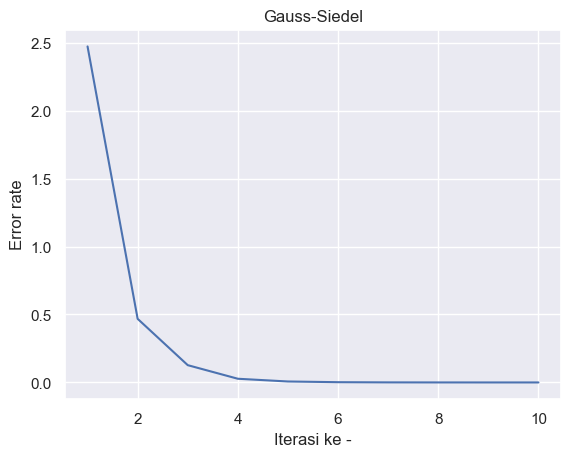

In [134]:
matriks.plot()

In [135]:
# import sympy as sym
# from pprint import pprint

# eq = [
#     "10*x1 - x2 + 2*x3 - 6",
#     "-x1 + 11*x2 - x3 + 3*x4 - 25",
#     "2*x1 - x2 + 10*x3 - x4 + 11",
#     "3*x2 - x3 + 8*x4 - 15",
# ]


# class Jacobi:
#     def __init__(self, _eq: list) -> None:
#         self.eq = [
#             sym.sympify(str(sym.solve(sym.sympify(__eq), sym.Symbol(f"x{i + 1}"))[0]))
#             for i, __eq in enumerate(_eq)
#         ]
#         self.x = {0: [0] * len(_eq)}
#         self.__log_iter = {
#             0: {"iter": 0, "xi": self.x[0], "norm": "-", "norm_inf": "-"}
#         }

#     def solve(self, n_iter: int) -> list:
#         for i in range(n_iter):
#             subs_dict = {
#                 sym.Symbol(f"x{k+1}"): float(self.x[i][k])
#                 for k in range(len(self.x[i]))
#             }
#             x_curr = [_eq.subs(subs_dict).evalf() for _eq in self.eq]
#             self.x[i + 1] = x_curr
#             self.__log_iter[i + 1] = {
#                 "iter": i + 1,
#                 "xi": self.x[i + 1],
#                 "norm": self.norm(self.x[i + 1], self.x[i]),
#                 "norm_inf": self.norm_inf(self.x[i + 1], self.x[i]),
#             }
#         return self.x[n_iter]

#     @staticmethod
#     def norm(x1: list, x2: list) -> float:
#         return sum((a - b) ** 2 for a, b in zip(x1, x2)) ** 0.5

#     @staticmethod
#     def norm_inf(x1: list, x2: list) -> float:
#         return max(abs(a - b) for a, b in zip(x1, x2))

#     def get_iterations(self) -> dict:
#         n_iter = len(self.__log_iter) - 1
#         self.__log_iter[n_iter]["norm"] = self.__log_iter[n_iter - 1]["norm"]
#         self.__log_iter[n_iter]["norm_inf"] = self.__log_iter[n_iter - 1]["norm_inf"]
#         return self.__log_iter


# if __name__ == "__main__":
#     jacobi = Jacobi(eq)
#     pprint(jacobi.solve(n_iter=41))
#     pprint(jacobi.get_iterations())